Regression: the output variable takes continuous values.

Classification: the output variable takes class labels.

    f:x→y

If y is discrete/categorical variable, then this is classification problem.

If y is real number/continuous, then this is a regression problem.

About Euclidean Distance --> https://en.wikipedia.org/wiki/Euclidean_distance

dist((x, y), (a, b)) = √(x - a)² + (y - b)²


In [1]:
#Example 
from math import sqrt

x = (1,5)
y = (2,8)

Euclidean_Distance = sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2)

print(Euclidean_Distance)

3.1622776601683795


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from collections import Counter
import pandas as pd
import random
style.use('fivethirtyeight')

In [3]:
#Sample Data For Testing
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

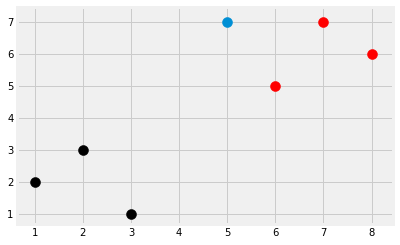

In [4]:
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1],s=100,color=i)

#[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)
plt.show()

In [5]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])

    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

In [6]:
#Sample Data
result = k_nearest_neighbors(dataset, new_features)
print(result)

r


About The Data Set used here : https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names

In [9]:
df = pd.read_csv('data/breast-cancer-wisconsin.data')
df.replace('?' , -99999, inplace = True)
df.drop(['id'],1,inplace = True)
full_data = df.astype(float).values.tolist()
print(full_data[:10])

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0], [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0], [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0], [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0], [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0]]


In [10]:
# Suffling the Data and create Test train split 
random.shuffle(full_data)
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [11]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [12]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1

In [13]:
print('Accuracy:', correct/total)

Accuracy: 0.9712230215827338
